In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv("Clans_and_families_extended.csv")
df.head()

,Genome,BGC_full,Class,BiG-SCAPE class,Product Prediction,Clan,Family_bgc,Pfam_vector,Pfam_vector_length,Pfam_descriptor,...,Assembly accession,Genus,Family_tax,Origin,MAG,Completeness,Contamination,Strain_heterogeneity,Quality_score,Known_cluster
0,GCA_001975985.1,GCA_001975985.1_contig06.region001,NRPS,NRPS,NRPS,4935,1639,['PF00378.20 PF04023.14 PF02742.15 PF01325.19 ...,27,AMP-binding;AMP-binding_C;PP-binding;Condensation,...,GCA_001975985.1,Flavobacterium,Flavobacteriaceae,Non_marine,False,99.65,0.05,0.00,99.40,True
1,GCA_000154725.1,GCA_000154725.1_contig1.region002,NRPS,NRPS,NRPS-like,4935,1850,['PF00082.22 PF04542.14 PF14559.6 PF05147.13 P...,13,Coa1;T2SSE;T2SSF;T2SSF;DDE_Tnp_1_3;DUF1015;Pep...,...,GCA_000154725.1,Kordia,Flavobacteriaceae,Unclassified,False,99.48,0.61,0.00,96.43,False
2,GCA_000154725.1,GCA_000154725.1_contig1.region005,NRPS,NRPS,NRPS,4935,1853,['PF00082.22 PF04542.14 PF14559.6 PF05147.13 P...,13,Coa1;T2SSE;T2SSF;T2SSF;DDE_Tnp_1_3;DUF1015;Pep...,...,GCA_000154725.1,Kordia,Flavobacteriaceae,Unclassified,False,99.48,0.61,0.00,96.43,False
3,GCA_000171875.1,GCA_000171875.1_contig5.region002,NRPS,PKS-NRP_Hybrids,T1PKS.NRPS,4935,1858,['PF00456.21 PF02779.24 PF02780.20 PF13568.6 P...,21,Sigma70_r4_2;TRAM;tRNA_U5-meth_tr;DinB_2;Cupin...,...,GCA_000171875.1,Winogradskyella,Flavobacteriaceae,Unclassified,False,98.84,1.76,88.89,90.04,False
4,GCA_000218485.2,GCA_000218485.2_contig148.region001,NRPS,NRPS,NRPS,4935,1897,['PF00282.19 PF13434.6 PF07690.16 PF13523.6 PF...,25,PAAR_motif;Phage_GPD;Rhomboid;TssD;TssD;DUF302...,...,GCA_000218485.2,Aquimarina,Flavobacteriaceae,Unclassified,False,99.62,0.57,0.00,96.77,True


In [25]:
bgc = pd.read_csv("../../3_Annotation/antismash_results/BGCs_resumed.csv")
bgc = bgc.set_index("index").T
bgc["Nr_BGCs"] = bgc.sum(axis=1)

bgc.head()

index,NRPS,NRPS_PKS_hybrid,NRPS_other,Others,PKSI,PKSIII,PKS_other,RiPPs,Siderophore,terpene,transAT_PSK,Nr_BGCs
GCA_002831645.1,0,0,0,1,0,1,0,1,0,1,0,4
GCA_001971785.1,0,0,0,0,0,0,0,1,0,1,0,2
GCA_002951395.1,0,0,0,0,0,0,0,0,1,1,0,2
GCA_903969135.1,1,0,0,1,0,0,1,3,1,1,0,8
GCA_009664855.1,0,0,0,2,0,1,0,2,0,2,0,7


In [17]:
mags = pd.read_csv("mags_tree.txt")
mags.head()

,MAG_fraction
0,GCA_014239665.1
1,GCA_013372885.1
2,GCA_013373635.1
3,GCA_002687665.1
4,GCA_002389535.1


In [19]:
df_mags = pd.merge(mags, df, how="inner", left_on="MAG_fraction", right_on="Genome")
df_mags.head(2)

,MAG_fraction,Genome,BGC_full,Class,BiG-SCAPE class,Product Prediction,Clan,Family_bgc,Pfam_vector,Pfam_vector_length,...,Assembly accession,Genus,Family_tax,Origin,MAG,Completeness,Contamination,Strain_heterogeneity,Quality_score,Known_cluster
0,GCA_014239665.1,GCA_014239665.1,GCA_014239665.1_contig29.region001,Terpene,Terpene,terpene,6097,9530,['PF00313.22 PF00313.22 PF03796.15 PF00772.21 ...,22,...,GCA_014239665.1,MED-G11,Flavobacteriaceae,Marine,True,84.53,3.68,16.67,66.13,False
1,GCA_014239665.1,GCA_014239665.1,GCA_014239665.1_contig90.region001,Terpene,Terpene,terpene,6097,9531,['PF00313.22 PF00313.22 PF03796.15 PF00772.21 ...,22,...,GCA_014239665.1,MED-G11,Flavobacteriaceae,Marine,True,84.53,3.68,16.67,66.13,False


In [36]:
df_bgcs= pd.merge(mags, bgc, how="left", left_on="MAG_fraction", right_index=True)
df_bgcs = df_bgcs.sort_values(by="Nr_BGCs",ascending=False)
df_bgcs = df_bgcs.set_index("MAG_fraction")
df_bgcs = df_bgcs.fillna(0).astype("int")
df_bgcs = df_bgcs.loc[:, (df_bgcs != 0).any(axis=0)]
df_bgcs.head()

,NRPS,Others,PKSIII,RiPPs,terpene,Nr_BGCs
MAG_fraction,,,,,,
GCA_002714815.1,0,1,0,0,2,3
GCA_002705625.1,0,0,0,0,3,3
GCA_002364535.1,0,0,1,0,2,3
GCA_005792865.1,0,0,1,0,2,3
GCA_002705485.1,0,0,0,1,2,3


<AxesSubplot:xlabel='MAG_fraction'>

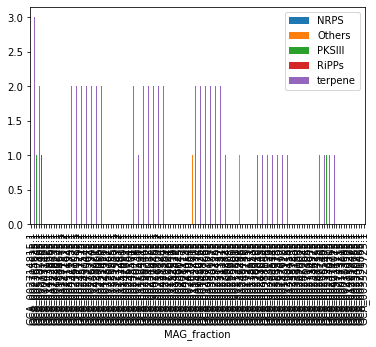

In [38]:
df_bgcs.drop(columns="Nr_BGCs").plot(kind="bar")

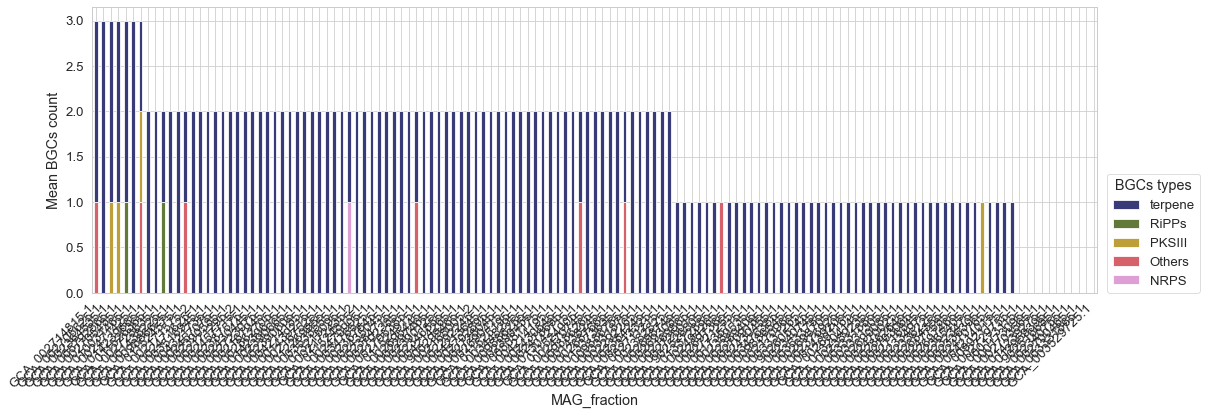

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm

from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

sns.set_style({'font.family': 'Arial'})
sns.set(style="whitegrid")
sns.set_context("paper", font_scale=1.5) 

cmap = cm.get_cmap('tab20b_r') # Colour map (there are many others)

ax = df_bgcs.drop(columns="Nr_BGCs").plot(kind="bar", stacked=True, cmap=cmap,
              figsize=(17,6))

plt.ylabel('Mean BGCs count')
plt.xticks(rotation=45, horizontalalignment='right')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc=(1.01,0),title="BGCs types")
#leg._legend_box.align = "left"


plt.tight_layout()
plt.show()

#ax.figure.savefig("BGCs_types.svg", dpi=300)

In [41]:
metadata = pd.read_csv("All_info.csv")
metadata = metadata[["Assembly accession", "Genus", "Family"]]
metadata.head()

,Assembly accession,Genus,Family
0,GCA_000016645.1,Flavobacterium,Flavobacteriaceae
1,GCA_000023285.1,Capnocytophaga,Flavobacteriaceae
2,GCA_000023465.1,Zunongwangia,Flavobacteriaceae
3,GCA_000023725.1,Kaistella,Weeksellaceae
4,GCA_000024125.1,Robiginitalea,Flavobacteriaceae


In [42]:
bgc = pd.merge(df_bgcs, metadata, how="left", left_index=True, right_on="Assembly accession")
bgc.head()

,NRPS,Others,PKSIII,RiPPs,terpene,Nr_BGCs,Assembly accession,Genus,Family
995,0,1,0,0,2,3,GCA_002714815.1,MS024-2A,Flavobacteriaceae
979,0,0,0,0,3,3,GCA_002705625.1,MED-G11,Flavobacteriaceae
752,0,0,1,0,2,3,GCA_002364535.1,UBA8316,Flavobacteriaceae
1627,0,0,1,0,2,3,GCA_005792865.1,Flavobacterium,Flavobacteriaceae
978,0,0,0,1,2,3,GCA_002705485.1,MAG-121220-bin8,Flavobacteriaceae


In [ ]:
bgc.plot(kind="bar")

In [46]:
bgcs_mean = bgc.groupby(['Genus', "Family"]).describe()
bgcs_mean.head(20)

NRPS                                \
                                          count mean  std  min  25%  50%  75%   
Genus                   Family                                                  
Aquimarina              Flavobacteriaceae   1.0  0.0  NaN  0.0  0.0  0.0  0.0   
Flavobacterium          Flavobacteriaceae   1.0  0.0  NaN  0.0  0.0  0.0  0.0   
Leeuwenhoekiella        Flavobacteriaceae   1.0  0.0  NaN  0.0  0.0  0.0  0.0   
MAG-120531              Flavobacteriaceae  27.0  0.0  0.0  0.0  0.0  0.0  0.0   
MAG-121220-bin8         Flavobacteriaceae  11.0  0.0  0.0  0.0  0.0  0.0  0.0   
MED-G11                 Flavobacteriaceae   8.0  0.0  0.0  0.0  0.0  0.0  0.0   
MED-G14                 Flavobacteriaceae  12.0  0.0  0.0  0.0  0.0  0.0  0.0   
MS024-2A                Flavobacteriaceae  19.0  0.0  0.0  0.0  0.0  0.0  0.0   
SHLJ01                  Flavobacteriaceae   1.0  0.0  NaN  0.0  0.0  0.0  0.0   
UBA11891                Flavobacteriaceae   8.0  0.0  0.0  0.0  0.0  0.0  0.0   
UBA3537                 Flavobacteriaceae  12.0  0.0  0.0  0.0  0.0  0.0  0.0   
UBA724                  Flavobacteriaceae   9.0  0.0  0.0  0.0  0.0  0.0  0.0   
UBA7446                 Flavobacteriaceae  12.0  0.0  0.0  0.0  0.0  0.0  0.0   
UBA8316                 Flavobacteriaceae  12.0  0.0  0.0  0.0  0.0  0.0  0.0   
Uncl. Flavobacteriaceae Flavobacteriaceae   1.0  1.0  NaN  1.0  1.0  1.0  1.0   

                                               Others            ... terpene  \
                                           max  count      mean  ...     75%   
Genus                   Family                                   ...           
Aquimarina              Flavobacteriaceae  0.0    1.0  1.000000  ...     1.0   
Flavobacterium          Flavobacteriaceae  0.0    1.0  0.000000  ...     2.0   
Leeuwenhoekiella        Flavobacteriaceae  0.0    1.0  1.000000  ...     1.0   
MAG-120531              Flavobacteriaceae  0.0   27.0  0.074074  ...     2.0   
MAG-121220-bin8         Flavobacteriaceae  0.0   11.0  0.000000  ...     2.0   
MED-G11                 Flavobacteriaceae  0.0    8.0  0.000000  ...     2.0   
MED-G14                 Flavobacteriaceae  0.0   12.0  0.000000  ...     2.0   
MS024-2A                Flavobacteriaceae  0.0   19.0  0.105263  ...     2.0   
SHLJ01                  Flavobacteriaceae  0.0    1.0  1.000000  ...     1.0   
UBA11891                Flavobacteriaceae  0.0    8.0  0.000000  ...     2.0   
UBA3537                 Flavobacteriaceae  0.0   12.0  0.000000  ...     1.0   
UBA724                  Flavobacteriaceae  0.0    9.0  0.000000  ...     2.0   
UBA7446                 Flavobacteriaceae  0.0   12.0  0.000000  ...     2.0   
UBA8316                 Flavobacteriaceae  0.0   12.0  0.000000  ...     2.0   
Uncl. Flavobacteriaceae Flavobacteriaceae  1.0    1.0  0.000000  ...     1.0   

                                               Nr_BGCs                      \
                                           max   count      mean       std   
Genus                   Family                                               
Aquimarina              Flavobacteriaceae  1.0     1.0  2.000000       NaN   
Flavobacterium          Flavobacteriaceae  2.0     1.0  3.000000       NaN   
Leeuwenhoekiella        Flavobacteriaceae  1.0     1.0  3.000000       NaN   
MAG-120531              Flavobacteriaceae  2.0    27.0  1.481481  0.642733   
MAG-121220-bin8         Flavobacteriaceae  2.0    11.0  1.090909  1.044466   
MED-G11                 Flavobacteriaceae  3.0     8.0  1.750000  0.886405   
MED-G14                 Flavobacteriaceae  2.0    12.0  1.583333  0.514929   
MS024-2A                Flavobacteriaceae  3.0    19.0  1.684211  0.749269   
SHLJ01                  Flavobacteriaceae  1.0     1.0  2.000000       NaN   
UBA11891                Flavobacteriaceae  2.0     8.0  1.625000  0.517549   
UBA3537                 Flavobacteriaceae  1.0    12.0  0.750000  0.452267   
UBA724                  Flavobacteriaceae  2.0     